20
Beam 1, box 1 in willowcreek file 3 has no data.
Beam 2, box 1 in willowcreek file 3 has no data.
Nothing in rebinned section for willowcreek file 3's beam 3.
Nothing in rebinned section for willowcreek file 3's beam 4.
Nothing in rebinned section for willowcreek file 3's beam 5.
Nothing in rebinned section for willowcreek file 3's beam 6.


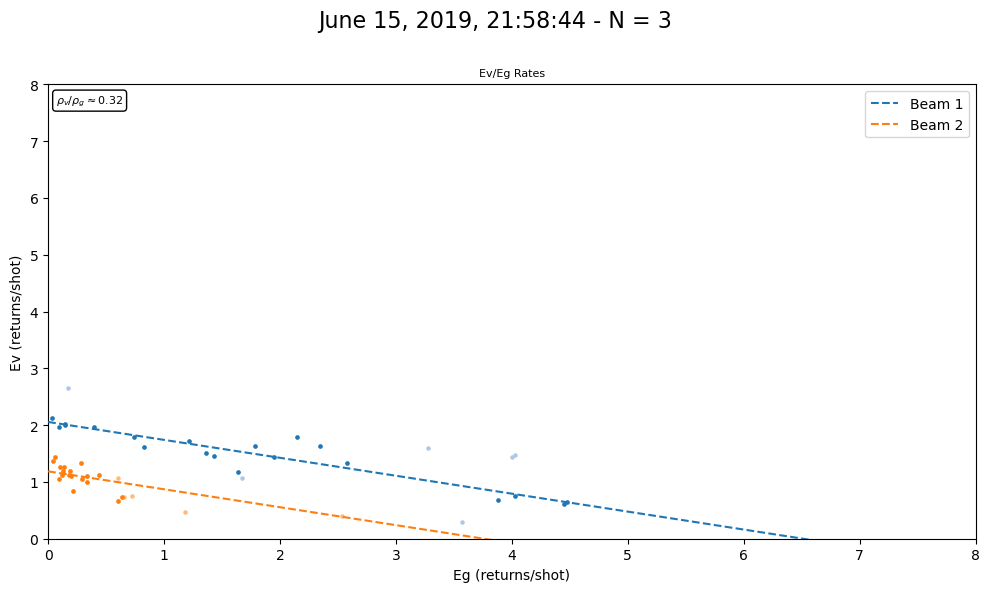

Beam 1, box 1 in willowcreek file 3 has no data.
Beam 2, box 1 in willowcreek file 3 has no data.
Nothing in rebinned section for willowcreek file 3's beam 3.
Nothing in rebinned section for willowcreek file 3's beam 4.
Nothing in rebinned section for willowcreek file 3's beam 5.
Nothing in rebinned section for willowcreek file 3's beam 6.


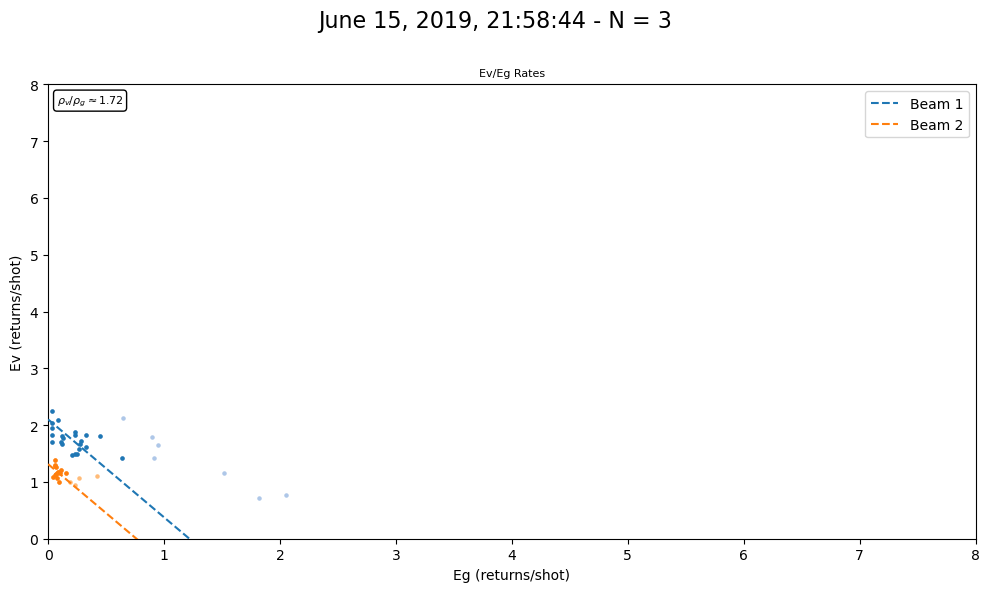

Nothing in rebinned section for willowcreek file 3's beam 1.
Nothing in rebinned section for willowcreek file 3's beam 2.
Beam 3, box 1 in willowcreek file 3 has no data.
Beam 4, box 1 in willowcreek file 3 has no data.
Nothing in rebinned section for willowcreek file 3's beam 5.
Nothing in rebinned section for willowcreek file 3's beam 6.


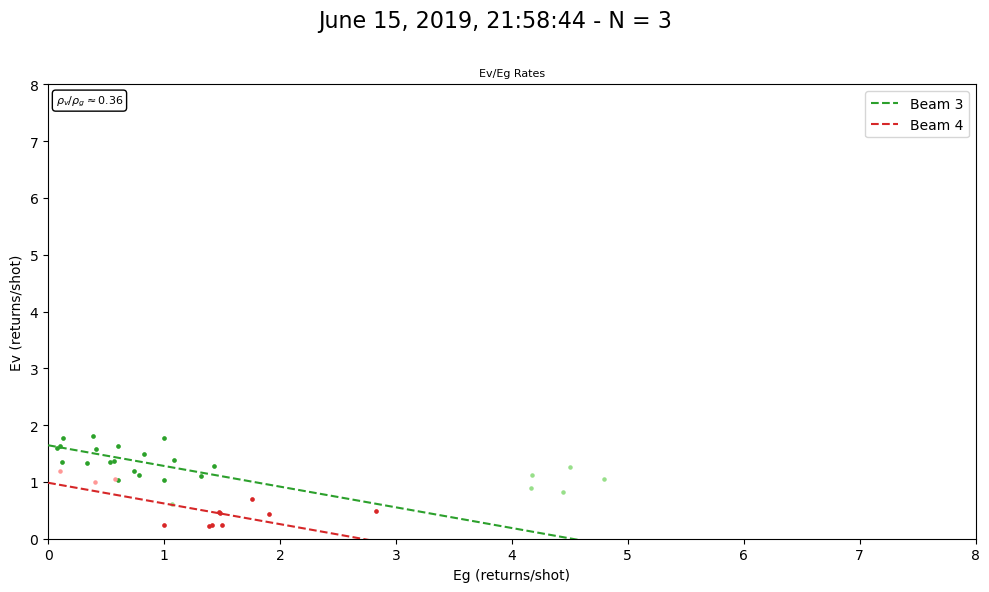

Nothing in rebinned section for willowcreek file 3's beam 1.
Nothing in rebinned section for willowcreek file 3's beam 2.
Beam 3, box 1 in willowcreek file 3 has no data.
Beam 4, box 1 in willowcreek file 3 has no data.
Nothing in rebinned section for willowcreek file 3's beam 5.
Nothing in rebinned section for willowcreek file 3's beam 6.


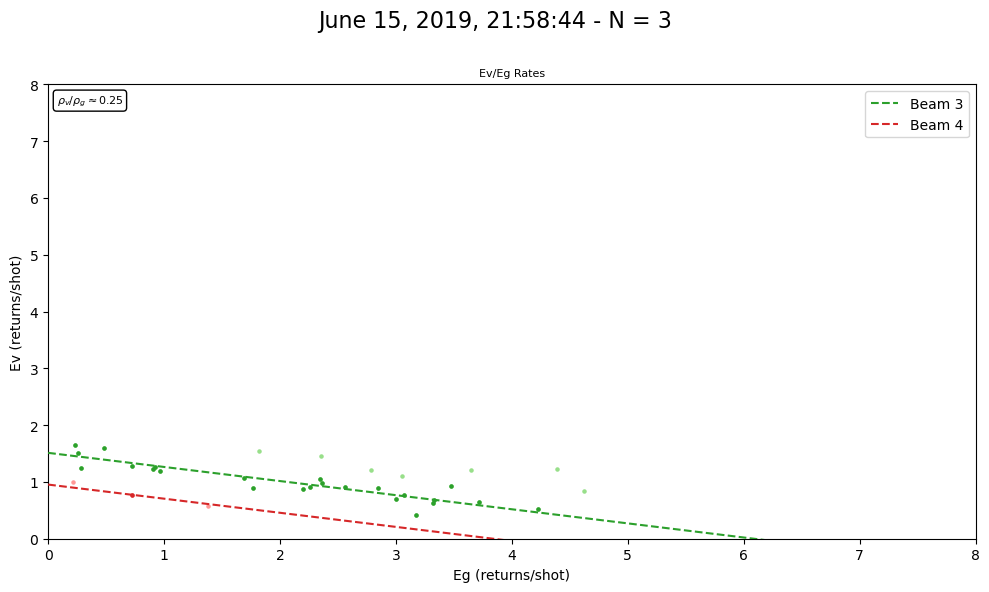

In [1]:
from scripts.parallel_blocks import *

dirpath = '../scratch/data/willowcreek/'

all_ATL03, all_ATL08, failed_ATL03 = track_pairs(dirpath, failed=True)
N = len(all_ATL03)
print(N-1)

# coords = (-90.0791, 45.8060)
coords = [(-90.111409,45.774468),(-90.111409,45.810505),(-90.059714,45.828523),(-90.059714,45.837532)]

for i in [3]:#range(N):
    for c in coords:
        data = pvpg_parallel(dirpath, all_ATL03[i], all_ATL08[i], coords=c, width=.5,height=.5,file_index=i, alt_thresh=80,\
                             altitude=521, threshold=3, small_box=1, graph_detail=1, loss='linear', rebinned=30, f_scale=.05,\
                             outlier_removal=0.22,method='normal', landcover='forest', trim_atmospheric=True, sat_flag=1)
        # print(data)

20
232
223
Beam 1, box 0 in willowcreek file 3 has no data.
Beam 1, box 2 in willowcreek file 3 has no data.
Beam 1, box 3 in willowcreek file 3 has no data.
Beam 1, box 4 in willowcreek file 3 has no data.
Beam 1, box 5 in willowcreek file 3 has no data.
Beam 1, box 6 in willowcreek file 3 has no data.
Beam 1, box 7 in willowcreek file 3 has no data.
Beam 1, box 8 in willowcreek file 3 has no data.
Beam 1, box 10 in willowcreek file 3 has no data.
Beam 1, box 11 in willowcreek file 3 has no data.
Beam 1, box 12 in willowcreek file 3 has no data.
Beam 1, box 13 in willowcreek file 3 has no data.
Beam 1, box 14 in willowcreek file 3 has no data.
Beam 1, box 15 in willowcreek file 3 has no data.
Beam 1, box 16 in willowcreek file 3 has no data.
Beam 1, box 18 in willowcreek file 3 has no data.
Beam 1, box 19 in willowcreek file 3 has no data.
Beam 1, box 20 in willowcreek file 3 has no data.
Beam 1, box 21 in willowcreek file 3 has no data.
Beam 1, box 22 in willowcreek file 3 has no dat

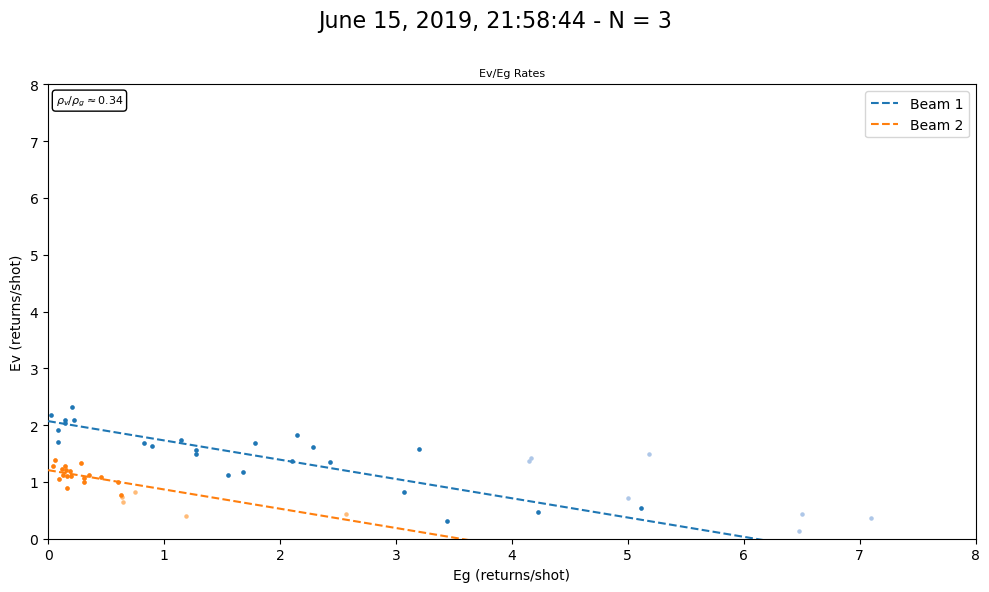

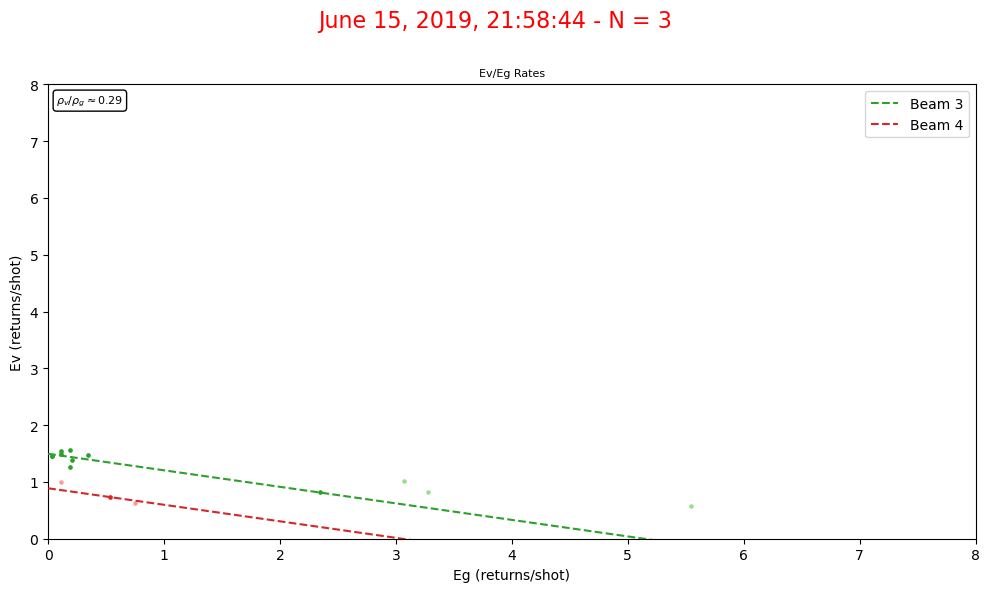

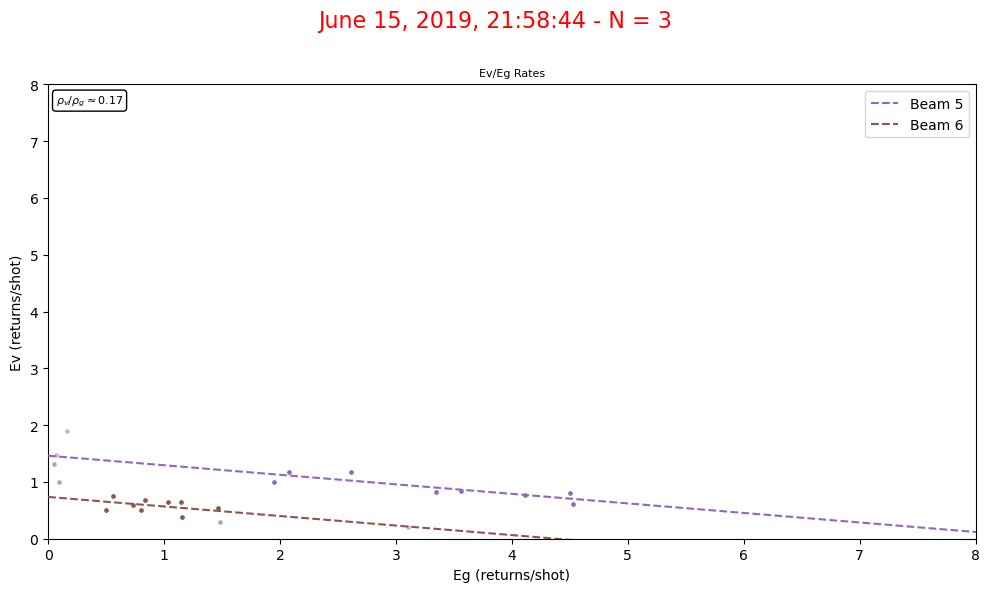

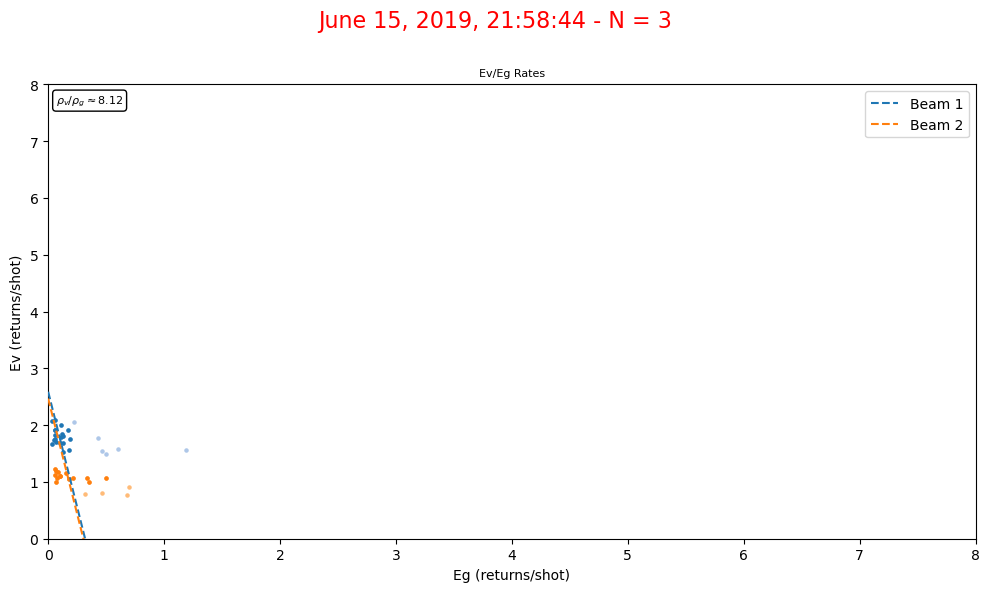

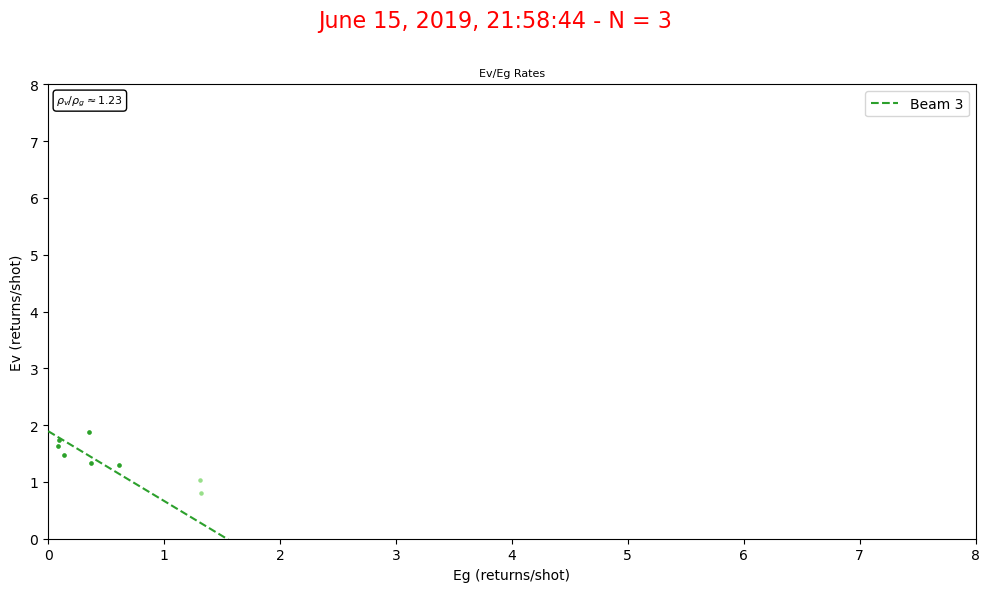

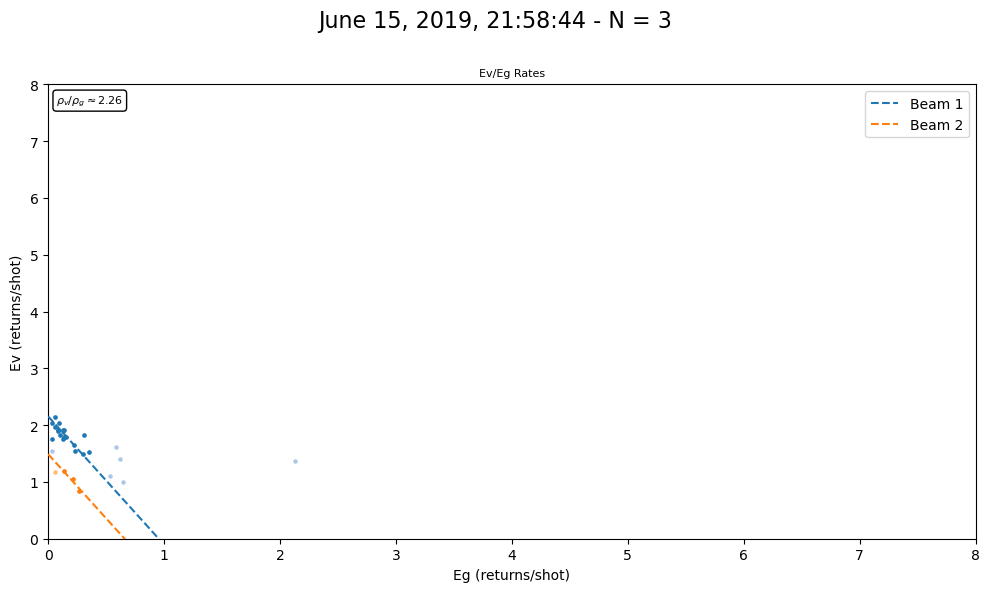

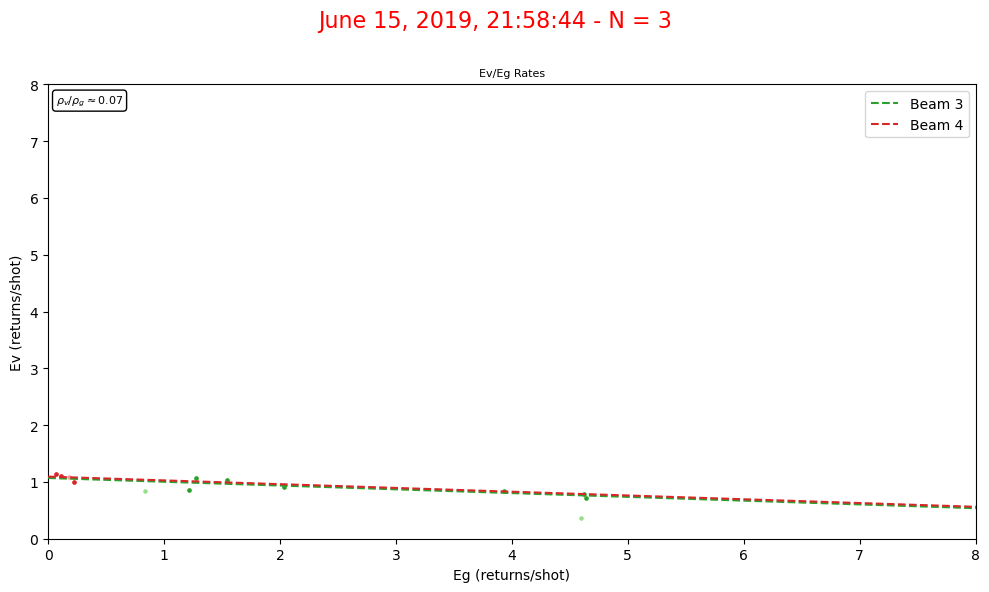

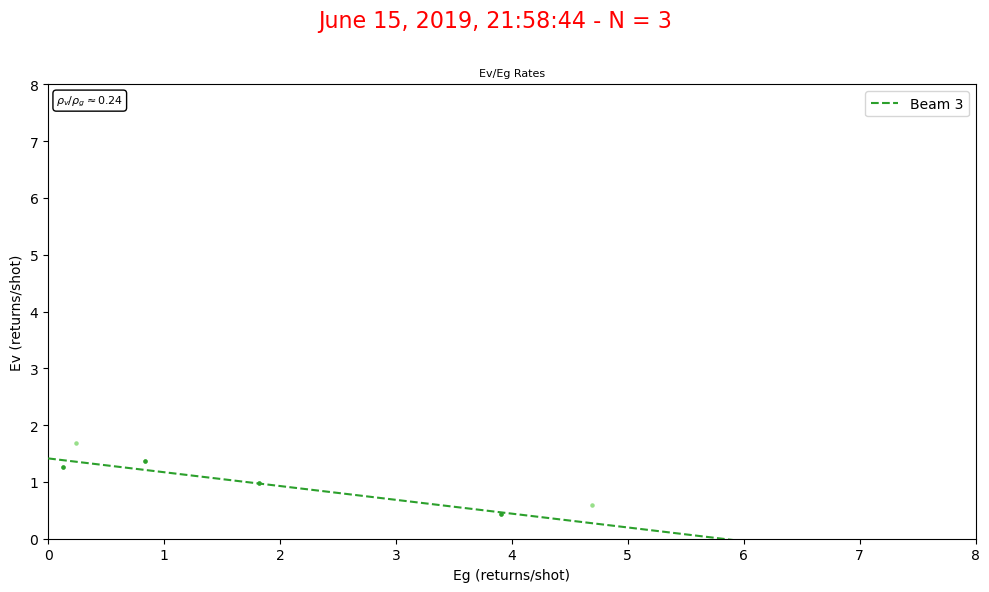

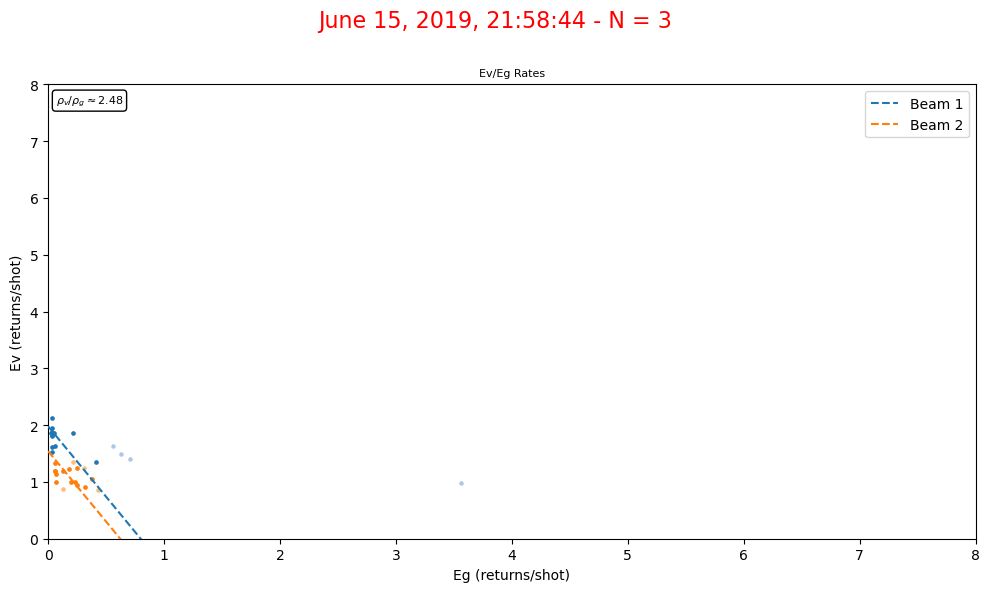

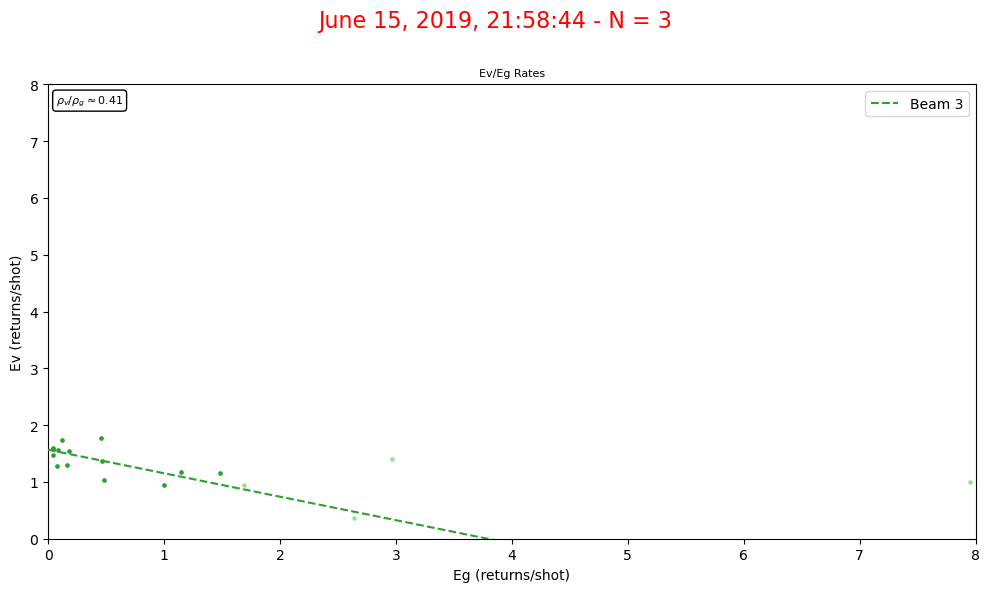

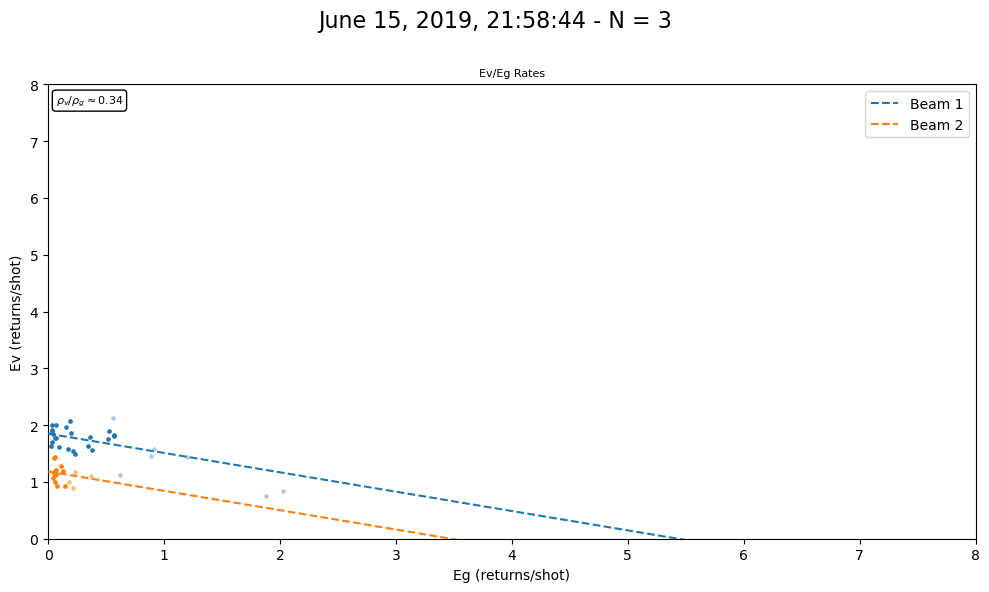

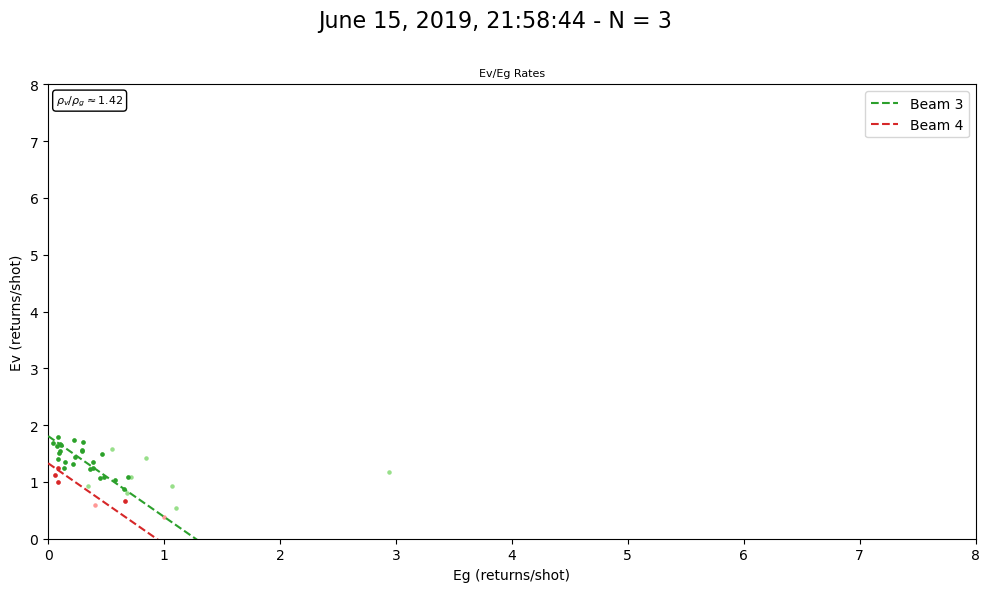

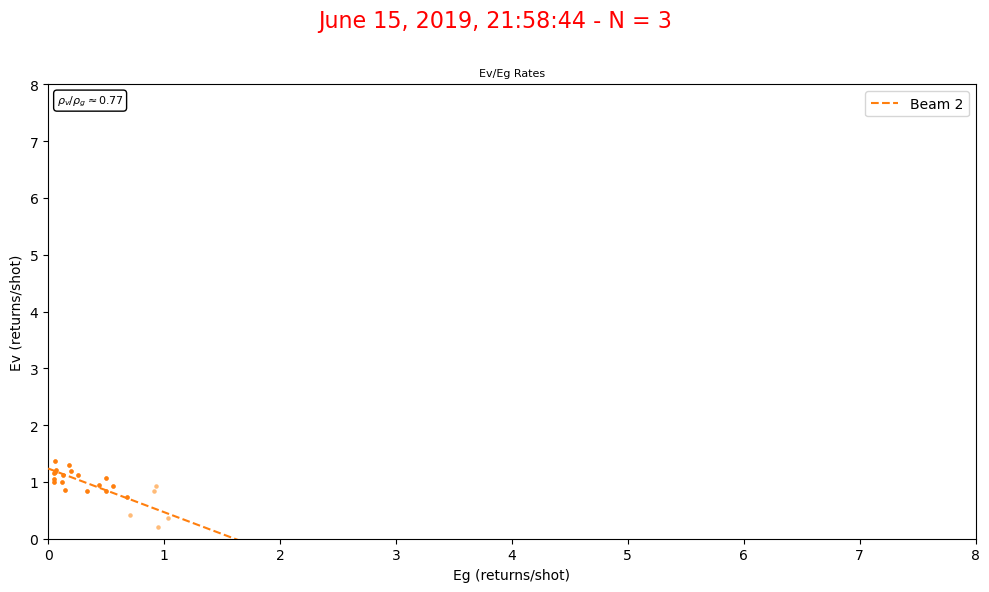

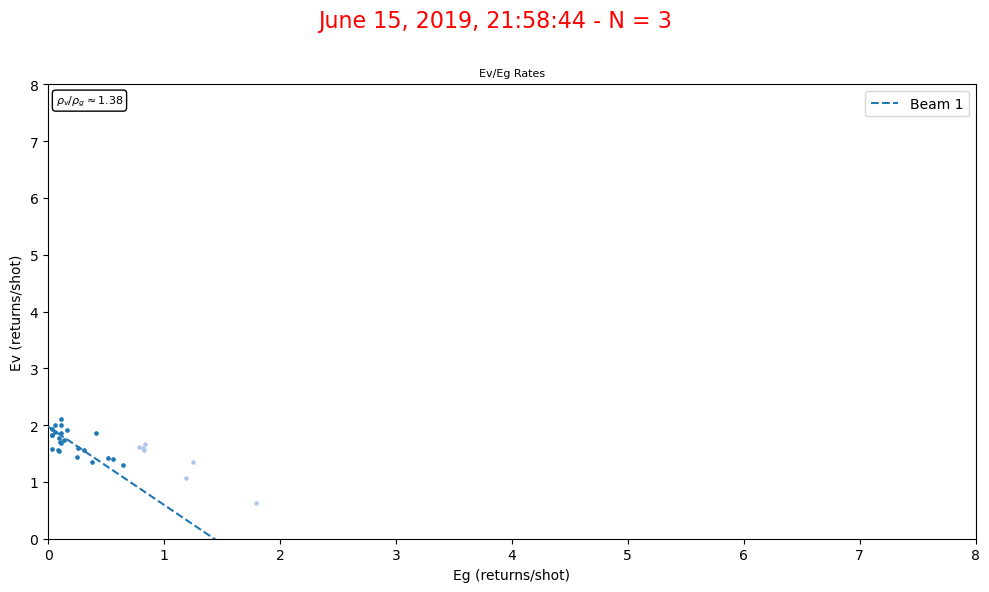

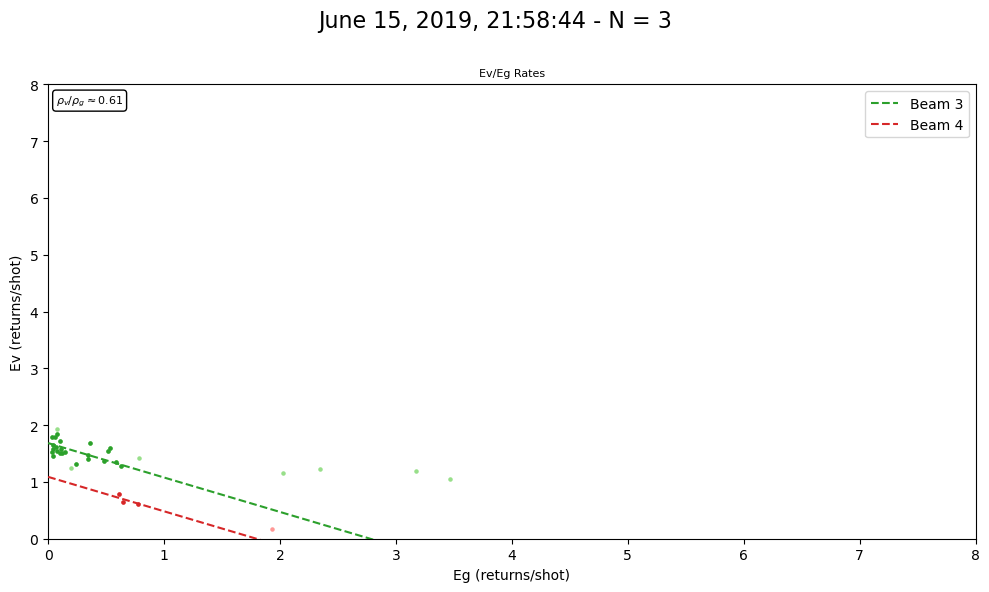

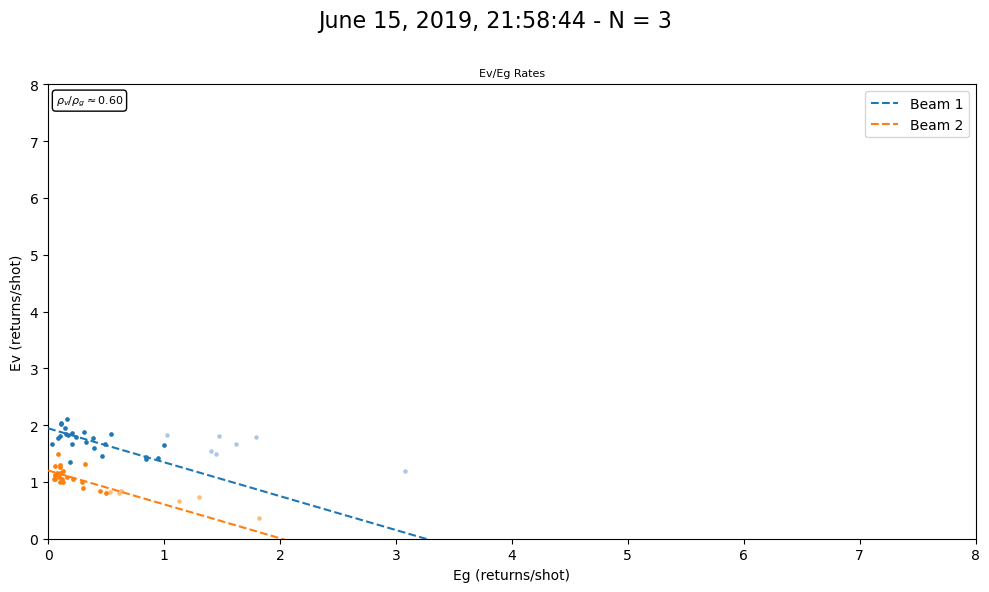

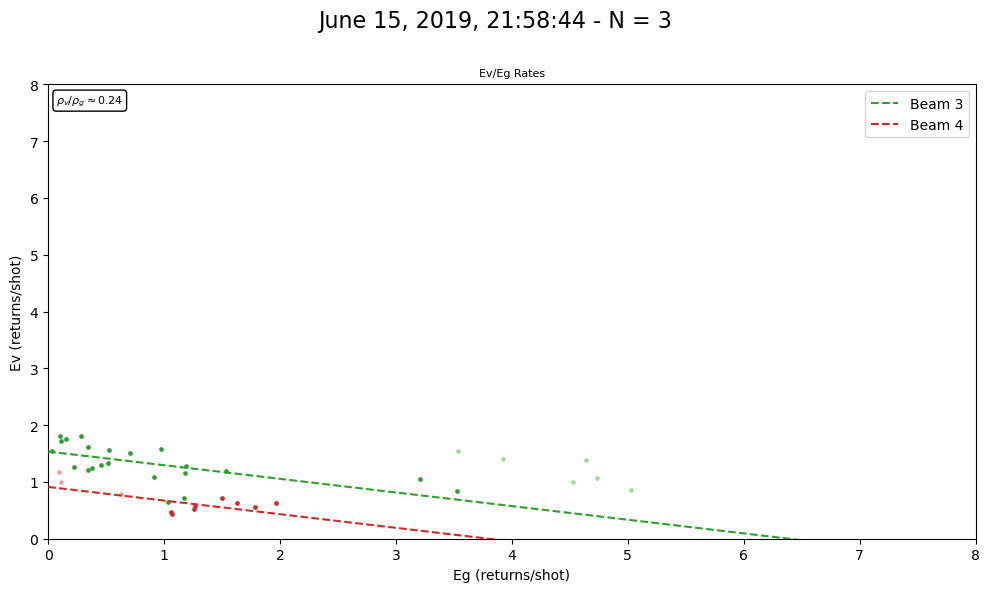

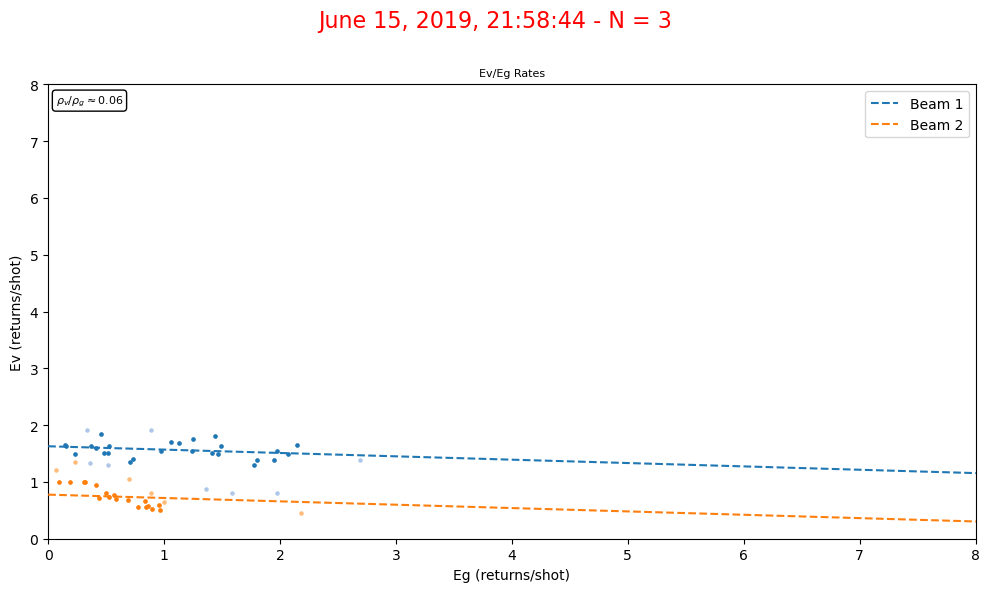

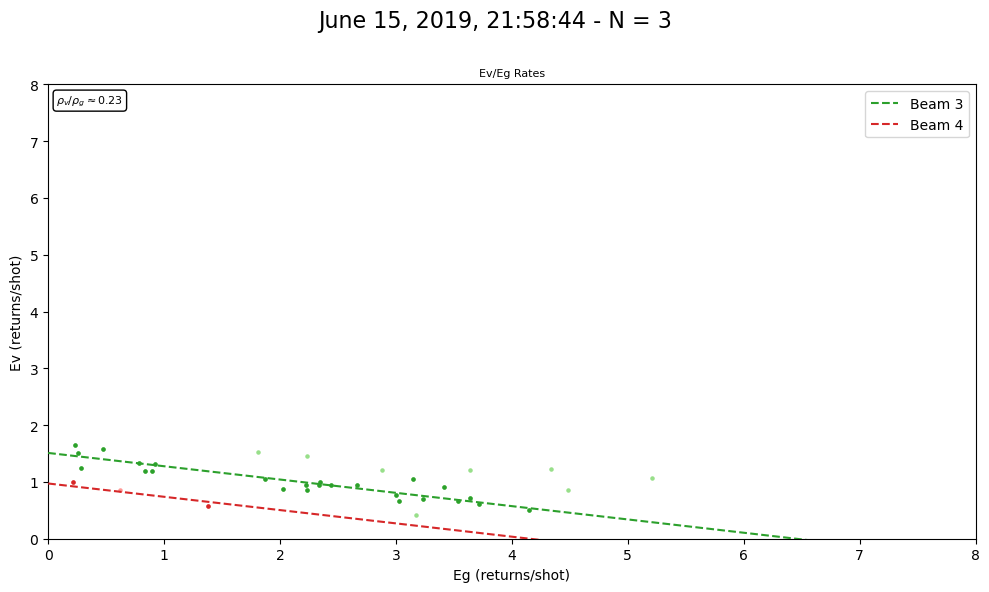

In [1]:
from scripts.parallel_blocks import *

dirpath = '../scratch/data/willowcreek/'

all_ATL03, all_ATL08, failed_ATL03 = track_pairs(dirpath, failed=True)
N = len(all_ATL03)
print(N-1)

coords = (-90.0791, 45.8060)

for i in [3]:#range(N):
    data = pvpg_parallel(dirpath, all_ATL03[i], all_ATL08[i], coords=coords, width=4,height=4,file_index=i, alt_thresh=80,\
                         altitude=521, threshold=3, small_box=1, graph_detail=1, loss='linear', rebinned=30, f_scale=.05,\
                         outlier_removal=0.22,method='normal', landcover='forest', trim_atmospheric=True, sat_flag=True)
    # print(data)

In [1]:
from scripts.parallel_blocks import *
import os

df = pd.read_pickle('dataset_lcforest_outlier22_th3_1km_noprior_ta.pkl')
# print(df.columns)

df_grouped = df.groupby(['camera','date','lat','lon']).agg({
    'pvpg': 'mean',
    'pv': 'max',
    'pg': 'max',
    'Eg': 'median',
    'Ev': 'median',
    'data_quantity': 'mean',
    'snr': 'mean',
    'FSC': 'mean',
    'TreeSnow': 'mean',
    'layer_flag': 'mean',
    'file_index': 'mean',
    'msw_flag': 'mean',
    'pv_ratio_mean': 'mean',
    'pv_ratio_max': 'mean',
}).reset_index()

data = df_grouped[((df_grouped['FSC'] > 0.05)&(df_grouped['FSC'] < 0.95))
    &(df_grouped['pv'] <= 16)&(df_grouped['pg'] <= 16)&(df_grouped['pvpg'] <= 7.5)
    &(df_grouped['pv_ratio_mean'] >= 1.3)
    &((df_grouped['layer_flag'] <= .7)|(df_grouped['msw_flag'] < 1))&(df_grouped['data_quantity'] >= 18)]

data.sort_values('FSC', inplace=True)

for _, row in data.iterrows():
    cam = row['camera']
    
    path1 = f'../data_store/data/{cam}/'
    path2 = f'../scratch/data/{cam}/'

    if os.path.exists(path1):
        dirpath = path1
    elif os.path.exists(path2):
        dirpath = path2
    else:
        print(f"No valid path for camera {cam}")
        continue

    all_ATL03, all_ATL08, failed_ATL03 = track_pairs(dirpath, failed=True)

    i = int(row['file_index'])

    print(f"{cam}, FSC = {round(row['FSC'],2)}")

    data = pvpg_parallel(dirpath, all_ATL03[i], all_ATL08[i], coords=(row['lon'],row['lat']), width=.5,height=.5,file_index=i,\
                         alt_thresh=80, altitude=row['elevation'], threshold=3, small_box=1.01, graph_detail=1, loss='linear',\
                         rebinned=30, outlier_removal=0.22,method='normal', landcover='forest', trim_atmospheric=True)#, sat_flag=True)

oregon_yp, FSC = 0.1
Nothing in rebinned section for oregon_yp file 0's beam 1.
Nothing in rebinned section for oregon_yp file 0's beam 2.
Nothing in rebinned section for oregon_yp file 0's beam 3.
Nothing in rebinned section for oregon_yp file 0's beam 4.
31
31
Beam 5, box 0 in oregon_yp file 0 has no data.
11
11
Beam 6, box 0 in oregon_yp file 0 has no data.
